In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

In [40]:
df = pd.read_csv('dataframe.csv')
N_df = pd.read_csv('Output_ZPrimeBoostedAnalysis/data.csv', delimiter=" ")
print(N_df.columns)

Index(['etmiss', 'mtw', 'leadleptPt', 'leadleptEta', 'leadleptE',
       'leadleptPhi', 'Q_leadlep', 'leadleptID', 'n_TopLRjets',
       'leadTopLRjet_pt', 'leadTopLRjet_eta', 'leadTopLRjet_phi',
       'leadTopLRjet_m', 'leadTopLRjet_Tau32', 'n_jets', 'leadjet_pt',
       'leadjet_eta', 'n_bjets', 'leadbjet_pt', 'leadbjet_eta', 'ttbarMLR',
       'largeRjet_pt_total', 'largeRjet_eta_total', 'largeRjet_phi_total',
       'largeRjet_m_total', 'largeRjet_tau32_total', 'weight'],
      dtype='object')


In [41]:
S_df = df.loc[df['label'] == 1]
B_df = df.loc[df['ID'] == 'ttbar_bkg']

B_df

,Unnamed: 0,ID,etmiss,mtw,leadleptPt,leadleptEta,leadleptE,leadleptPhi,Q_leadlep,leadleptID,...,ttbarMLR,largeRjet_pt_total,largeRjet_eta_total,largeRjet_phi_total,largeRjet_m_total,largeRjet_tau32_total,weight,scale,label,scaleweight
94678,94678,ttbar_bkg,138.4410,93.9966,130.0400,-0.441658,142.9300,1.062900,-1,11,...,750.620,333.228,1.081890,-2.649140,147.914,0.326111,0.326103,0.092418,0,0.030138
94679,94679,ttbar_bkg,301.5390,76.2308,37.1797,-0.585588,43.7388,-0.827447,-1,13,...,0.000,498.220,-1.644730,1.538870,127.010,0.651911,1.144100,0.092418,0,0.105736
94680,94680,ttbar_bkg,121.4360,67.4178,45.7490,0.718775,58.0845,1.089530,-1,11,...,0.000,327.376,0.278645,-1.164760,129.256,0.497427,0.585280,0.092418,0,0.054091
94681,94681,ttbar_bkg,47.9440,188.8650,188.4250,-0.518880,214.3640,-0.272070,-1,13,...,899.172,374.357,-1.762890,2.938160,129.779,0.746580,0.692242,0.092418,0,0.063976
94682,94682,ttbar_bkg,39.7981,43.7249,47.7372,1.661620,130.2670,-3.042710,-1,13,...,673.801,611.219,1.227440,-3.334090,162.214,0.966985,1.200830,0.092418,0,0.110979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249438,249438,ttbar_bkg,57.2860,40.9154,62.1744,1.680050,172.6010,0.547535,-1,11,...,0.000,311.611,-0.303151,2.601820,102.453,0.490593,1.131250,0.092418,0,0.104548
249439,249439,ttbar_bkg,156.8420,6.0424,221.7000,1.566210,553.9510,-1.876650,1,11,...,0.000,499.428,0.281326,2.410640,125.979,0.472799,0.849809,0.092418,0,0.078538
249440,249440,ttbar_bkg,220.8640,44.9105,30.1318,0.984358,45.9475,-3.112210,-1,11,...,1275.530,428.674,-1.939940,0.750768,102.550,0.740345,0.001599,0.092418,0,0.000148
249441,249441,ttbar_bkg,64.5557,35.8860,178.1710,0.976100,270.0060,-2.859350,-1,11,...,0.000,318.782,0.525273,0.465468,153.176,0.572873,0.189975,0.092418,0,0.017557


In [42]:
ttbar = pd.read_csv("Output_ZPrimeBoostedAnalysis/ttbar_lep.csv", delimiter=" ")
ttbar

,etmiss,mtw,leadleptPt,leadleptEta,leadleptE,leadleptPhi,Q_leadlep,leadleptID,n_TopLRjets,leadTopLRjet_pt,...,n_bjets,leadbjet_pt,leadbjet_eta,ttbarMLR,largeRjet_pt_total,largeRjet_eta_total,largeRjet_phi_total,largeRjet_m_total,largeRjet_tau32_total,weight
0,138.4410,93.9966,130.0400,-0.441658,142.9300,1.062900,-1,11,1,333.228,...,2,273.231,0.869808,750.620,333.228,1.081890,-2.649140,147.914,0.326111,0.326103
1,301.5390,76.2308,37.1797,-0.585588,43.7388,-0.827447,-1,13,1,498.220,...,1,346.317,-1.736670,0.000,498.220,-1.644730,1.538870,127.010,0.651911,1.144100
2,121.4360,67.4178,45.7490,0.718775,58.0845,1.089530,-1,11,1,327.376,...,2,216.480,0.122479,0.000,327.376,0.278645,-1.164760,129.256,0.497427,0.585280
3,47.9440,188.8650,188.4250,-0.518880,214.3640,-0.272070,-1,13,1,374.357,...,2,253.381,-1.960430,899.172,374.357,-1.762890,2.938160,129.779,0.746580,0.692242
4,39.7981,43.7249,47.7372,1.661620,130.2670,-3.042710,-1,13,1,331.558,...,1,265.127,0.752085,673.801,611.219,1.227440,-3.334090,162.214,0.966985,1.200830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154760,57.2860,40.9154,62.1744,1.680050,172.6010,0.547535,-1,11,1,311.611,...,1,266.780,-0.395491,0.000,311.611,-0.303151,2.601820,102.453,0.490593,1.131250
154761,156.8420,6.0424,221.7000,1.566210,553.9510,-1.876650,1,11,1,499.428,...,1,446.329,0.174121,0.000,499.428,0.281326,2.410640,125.979,0.472799,0.849809
154762,220.8640,44.9105,30.1318,0.984358,45.9475,-3.112210,-1,11,1,428.674,...,2,349.335,-1.826620,1275.530,428.674,-1.939940,0.750768,102.550,0.740345,0.001599
154763,64.5557,35.8860,178.1710,0.976100,270.0060,-2.859350,-1,11,1,318.782,...,2,208.339,0.850805,0.000,318.782,0.525273,0.465468,153.176,0.572873,0.189975


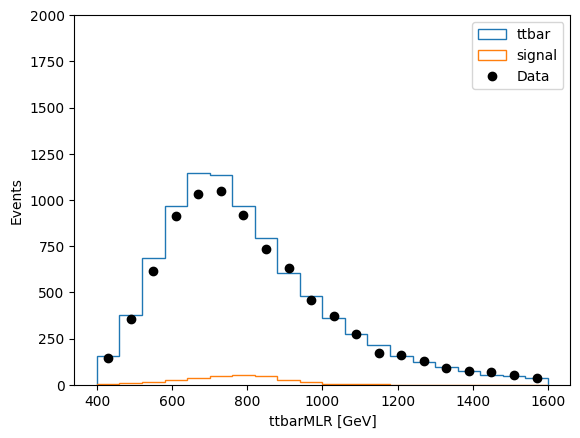

[ 147  355  616  911 1033 1049  918  734  629  460  371  272  173  162
  126   91   76   71   53   35]


In [72]:
plt.hist(B_df['ttbarMLR'], bins=20, histtype='step', label='ttbar', weights=B_df['scaleweight'], range=(400, 1600))
plt.hist(S_df['ttbarMLR'], bins=20, histtype='step', label='signal', weights=S_df['scaleweight'], range=(400, 1600)) 
counts, bins = np.histogram(N_df['ttbarMLR'], bins=20, range=(400, 1600))
plt.plot(bins[:-1]+30, counts, 'o', label='Data', color='black')
plt.xlabel('ttbarMLR [GeV]')
plt.ylabel('Events')
plt.ylim(0, 2000)
plt.legend()
plt.show()

print(counts)

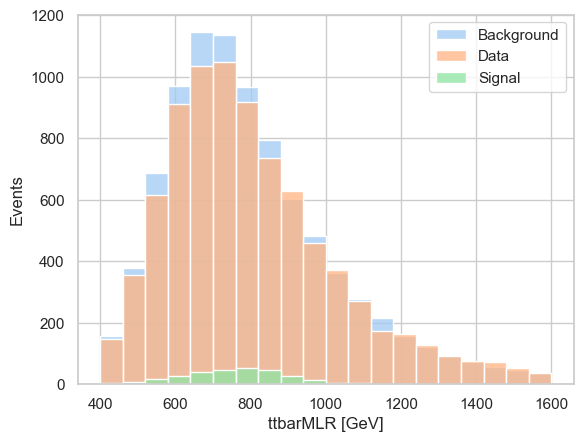

In [97]:
sns.set_theme(style="whitegrid", palette="pastel", gr)
sns.histplot(data=B_df, x='ttbarMLR', bins=20, weights=B_df['scaleweight'], binrange=(400, 1600), label="Background")
sns.histplot(data=N_df, x='ttbarMLR', bins=20, binrange=(400, 1600), label="Data")
sns.histplot(data=S_df, x='ttbarMLR', bins=20, weights=S_df['scaleweight'], binrange=(400, 1600), label="Signal")
plt.xlabel('ttbarMLR [GeV]')
plt.ylabel('Events')
plt.legend()
plt.show()



In [104]:
S, _ = np.histogram(S_df['ttbarMLR'], bins=20, range=(400, 1600), weights=S_df['scaleweight'])
B, _ = np.histogram(B_df['ttbarMLR'], bins=20, range=(400, 1600), weights=B_df['scaleweight'])
N, _ = np.histogram(N_df['ttbarMLR'], bins=20, range=(400, 1600))

array([ 158.12229213,  379.1309735 ,  687.90074384,  968.91048425,
       1144.58659418, 1136.30933618,  967.62647495,  794.73012233,
        601.91972048,  480.91740211,  359.90249405,  276.06592384,
        214.03635935,  158.06274702,  121.40357371,   96.32999946,
         71.75871944,   55.10679048,   46.91414044,   36.71513231])

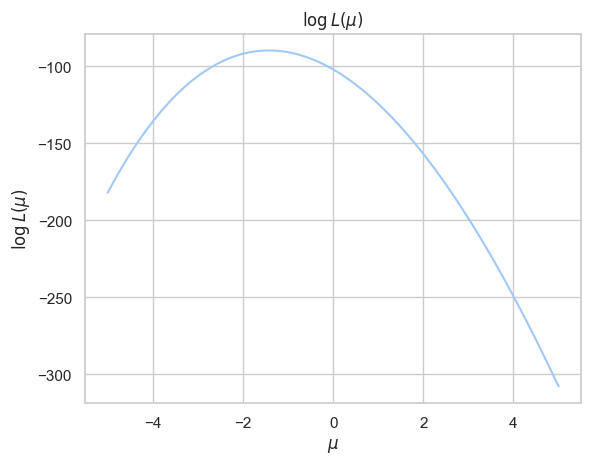

In [106]:
def likelihood(N_, S_, B_, mu_):
    return np.prod(scipy.stats.poisson.pmf(N_, mu_ * S_ + B_))

def log_likelihood(mu_array_):
    result = np.log([likelihood(N, S, B, mu_) for mu_ in mu_array_])
    return np.asarray(result)

mu = np.linspace(-5, 5, 7000)
log_likelihood_value = log_likelihood(mu)

plt.plot(mu, log_likelihood_value)
plt.xlabel(rf'$\mu$')
plt.ylabel(rf'$\log L(\mu)$')
plt.title(rf'$\log L(\mu)$')
plt.show()

The best-fit value of μ is: -1.4223


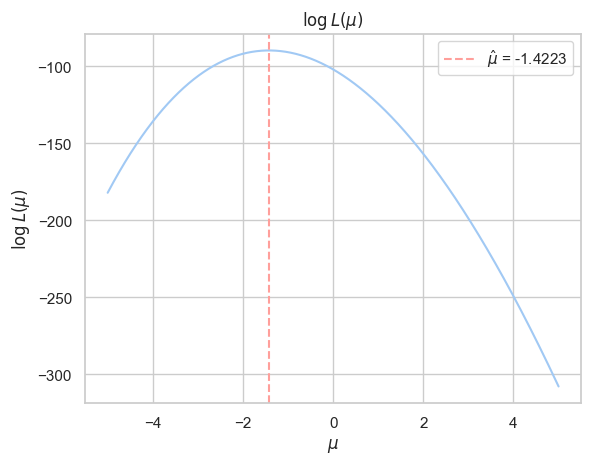

In [107]:
# Your answer
mu_hat_index = np.argmax(log_likelihood_value)  # Find the index of the maximum value of the log likelihood
mu_hat = mu[mu_hat_index]                       # Find the value of mu corresponding to the maximum value of the log likelihood

print(f"The best-fit value of μ is: {mu_hat:.4f}")

plt.plot(mu, log_likelihood_value)
plt.xlabel(rf'$\mu$')
plt.ylabel(rf'$\log L(\mu)$')
plt.title(rf'$\log L(\mu)$')
plt.axvline(x=mu_hat, color='r', linestyle='--', label=rf'$\hat \mu$ = {mu_hat:.4f}')
plt.legend()